In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import io
from google.colab import files
uploaded = files.upload()
training_df = pd.read_csv(io.BytesIO(uploaded['fashion-mnist_train.csv']))

Saving fashion-mnist_train.csv to fashion-mnist_train.csv


In [ ]:
uploaded = files.upload()
testing_df = pd.read_csv(io.BytesIO(uploaded['fashion-mnist_test.csv']))

Saving fashion-mnist_test.csv to fashion-mnist_test.csv


In [ ]:
training_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
testing_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
training_df.shape 

(60000, 785)

In [ ]:
training_df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [ ]:
trainData = np.array(training_df, dtype='float32')
testData = np.array(testing_df, dtype='float32')

In [36]:
print(trainData)
print('\n')
print(trainData.shape)

[[2. 0. 0. ... 0. 0. 0.]
 [9. 0. 0. ... 0. 0. 0.]
 [6. 0. 0. ... 0. 0. 0.]
 ...
 [8. 0. 0. ... 0. 0. 0.]
 [8. 0. 0. ... 0. 0. 0.]
 [7. 0. 0. ... 0. 0. 0.]]


(60000, 785)


In [ ]:
print(testData)
print('\n')
print(testData.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]
 ...
 [8. 0. 0. ... 0. 1. 0.]
 [8. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


(10000, 785)


4.0


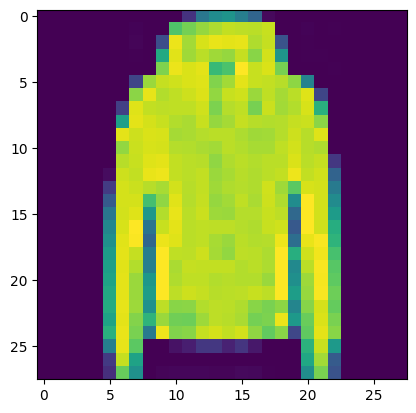

In [ ]:
import random
i = random.randint(1, trainData.shape[0])

# Displaying a random image using pixel values(reshaped)

plt.imshow(trainData[i, 1:].reshape(28, 28))
print(trainData[i, 0])

# Let's check all class values with labels for reference

# 0 = T-shirt/top
# 1 = Trouser
# 2 = Pullover
# 3 = Dress
# 4 = Coat
# 5 = Sandal
# 6 = Shirt
# 7 = Sneaker
# 8 = Bag
# 9 = Ankle boot

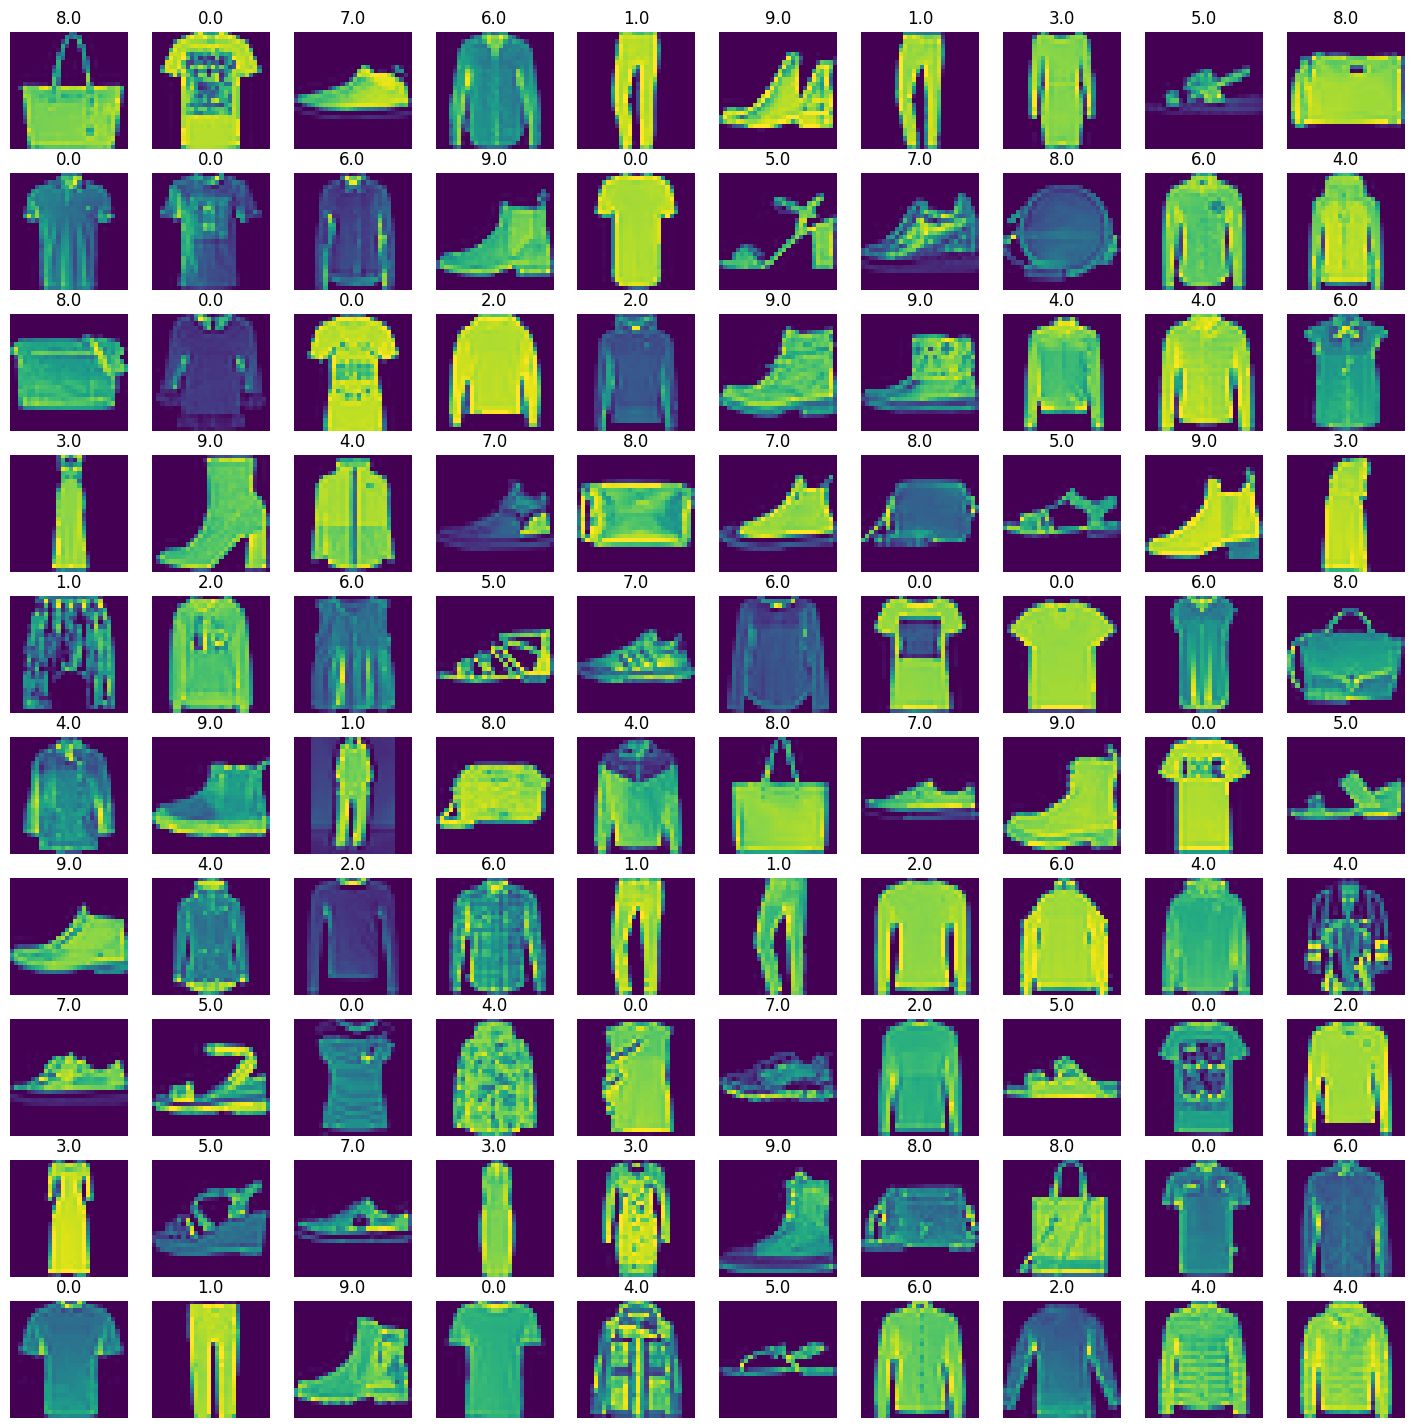

In [ ]:
Grid_W = 10 # Number of columns
Grid_H = 10 # Number of rows

# Let's create subplot to display multiple images

fig, axes = plt.subplots(nrows=Grid_H, ncols=Grid_W, figsize = (18,18))
axes = axes.ravel()

# Let's loop through the training dataset to display random 100 images

for i in np.arange(0, Grid_W*Grid_H):
    index = np.random.randint(0, len(trainData))
    axes[i].imshow(trainData[index, 1:].reshape(28, 28))
    axes[i].set_title(trainData[index, 0])
    axes[i].axis('off')   


In [ ]:
# Let's split the data into initial X_train and y_train data
# Normalizing each pixel value by dividing the same with 255
# i.e. Converting all pixel values between range 0 to 1

X_train_init = trainData[:, 1:] / 255 
y_train_init = trainData[:, 0]

# Let's do the same for test data

X_test = testData[:, 1:] / 255 
y_test = testData[:, 0]

In [ ]:
# Let's split the training data further to create training and validation data

# Importing necessary library

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_init, y_train_init, 
                                                      test_size=0.2, random_state = 0)

In [ ]:
X_train.shape


(48000, 784)

In [ ]:

X_valid.shape

(12000, 784)

In [ ]:
# Let's reshape the array similar to an image data e.g. (row, column, channel)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1)

In [ ]:

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import adam

In [ ]:
# Let's create a NN model

# Initialization of model

cnnModel = Sequential()

# Adding Convolution layer

cnnModel.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = (28,28,1), activation = 'relu'))

# Adding Pooling layer

cnnModel.add(MaxPooling2D(pool_size=(2,2)))

# Let's apply dropout

cnnModel.add(Dropout(0.2))

# Flattening the model output

cnnModel.add(Flatten())

# Adding a dense fully connected layer

cnnModel.add(Dense(units=64, activation = 'relu'))
cnnModel.add(Dense(units=32, activation = 'relu'))
cnnModel.add(Dense(units=10, activation = 'sigmoid'))

In [ ]:

cnnModel.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnnModel.fit(x=X_train, 
             y=y_train, 
             batch_size=512, 
             epochs=50, 
             verbose=1, 
             validation_data=(X_valid, y_valid)
            )


Epoch 1/50
94/94 [==============================] - 55s 559ms/step - loss: 0.6964 - accuracy: 0.7560 - val_loss: 0.4495 - val_accuracy: 0.8388
Epoch 2/50
94/94 [==============================] - 51s 543ms/step - loss: 0.4107 - accuracy: 0.8534 - val_loss: 0.3858 - val_accuracy: 0.8611
Epoch 3/50
94/94 [==============================] - 50s 532ms/step - loss: 0.3507 - accuracy: 0.8773 - val_loss: 0.3572 - val_accuracy: 0.8750
Epoch 4/50
94/94 [==============================] - 51s 534ms/step - loss: 0.3250 - accuracy: 0.8853 - val_loss: 0.3221 - val_accuracy: 0.8844
Epoch 5/50
94/94 [==============================] - 51s 545ms/step - loss: 0.3013 - accuracy: 0.8936 - val_loss: 0.3019 - val_accuracy: 0.8937
Epoch 6/50
94/94 [==============================] - 51s 541ms/step - loss: 0.2833 - accuracy: 0.8996 - val_loss: 0.2914 - val_accuracy: 0.8985
Epoch 7/50
94/94 [==============================] - 51s 540ms/step - loss: 0.2692 - accuracy: 0.9036 - val_loss: 0.3004 - val_accuracy: 0.8947

In [ ]:
# Checking the accuracy of model on test data

accuracy = cnnModel.evaluate(X_test, y_test)
print('Test Acuuracy : {}'.format(accuracy[1]))

313/313 [==============================] - 3s 8ms/step - loss: 0.3076 - accuracy: 0.9232
Test Acuuracy : 0.9232000112533569


In [ ]:
# prediction_classes = cnnModel.predict_classes(X_test)
predict_x= cnnModel.predict(X_test)
prediction_classes=np.argmax(predict_x,axis=1)

313/313 [==============================] - 3s 8ms/step


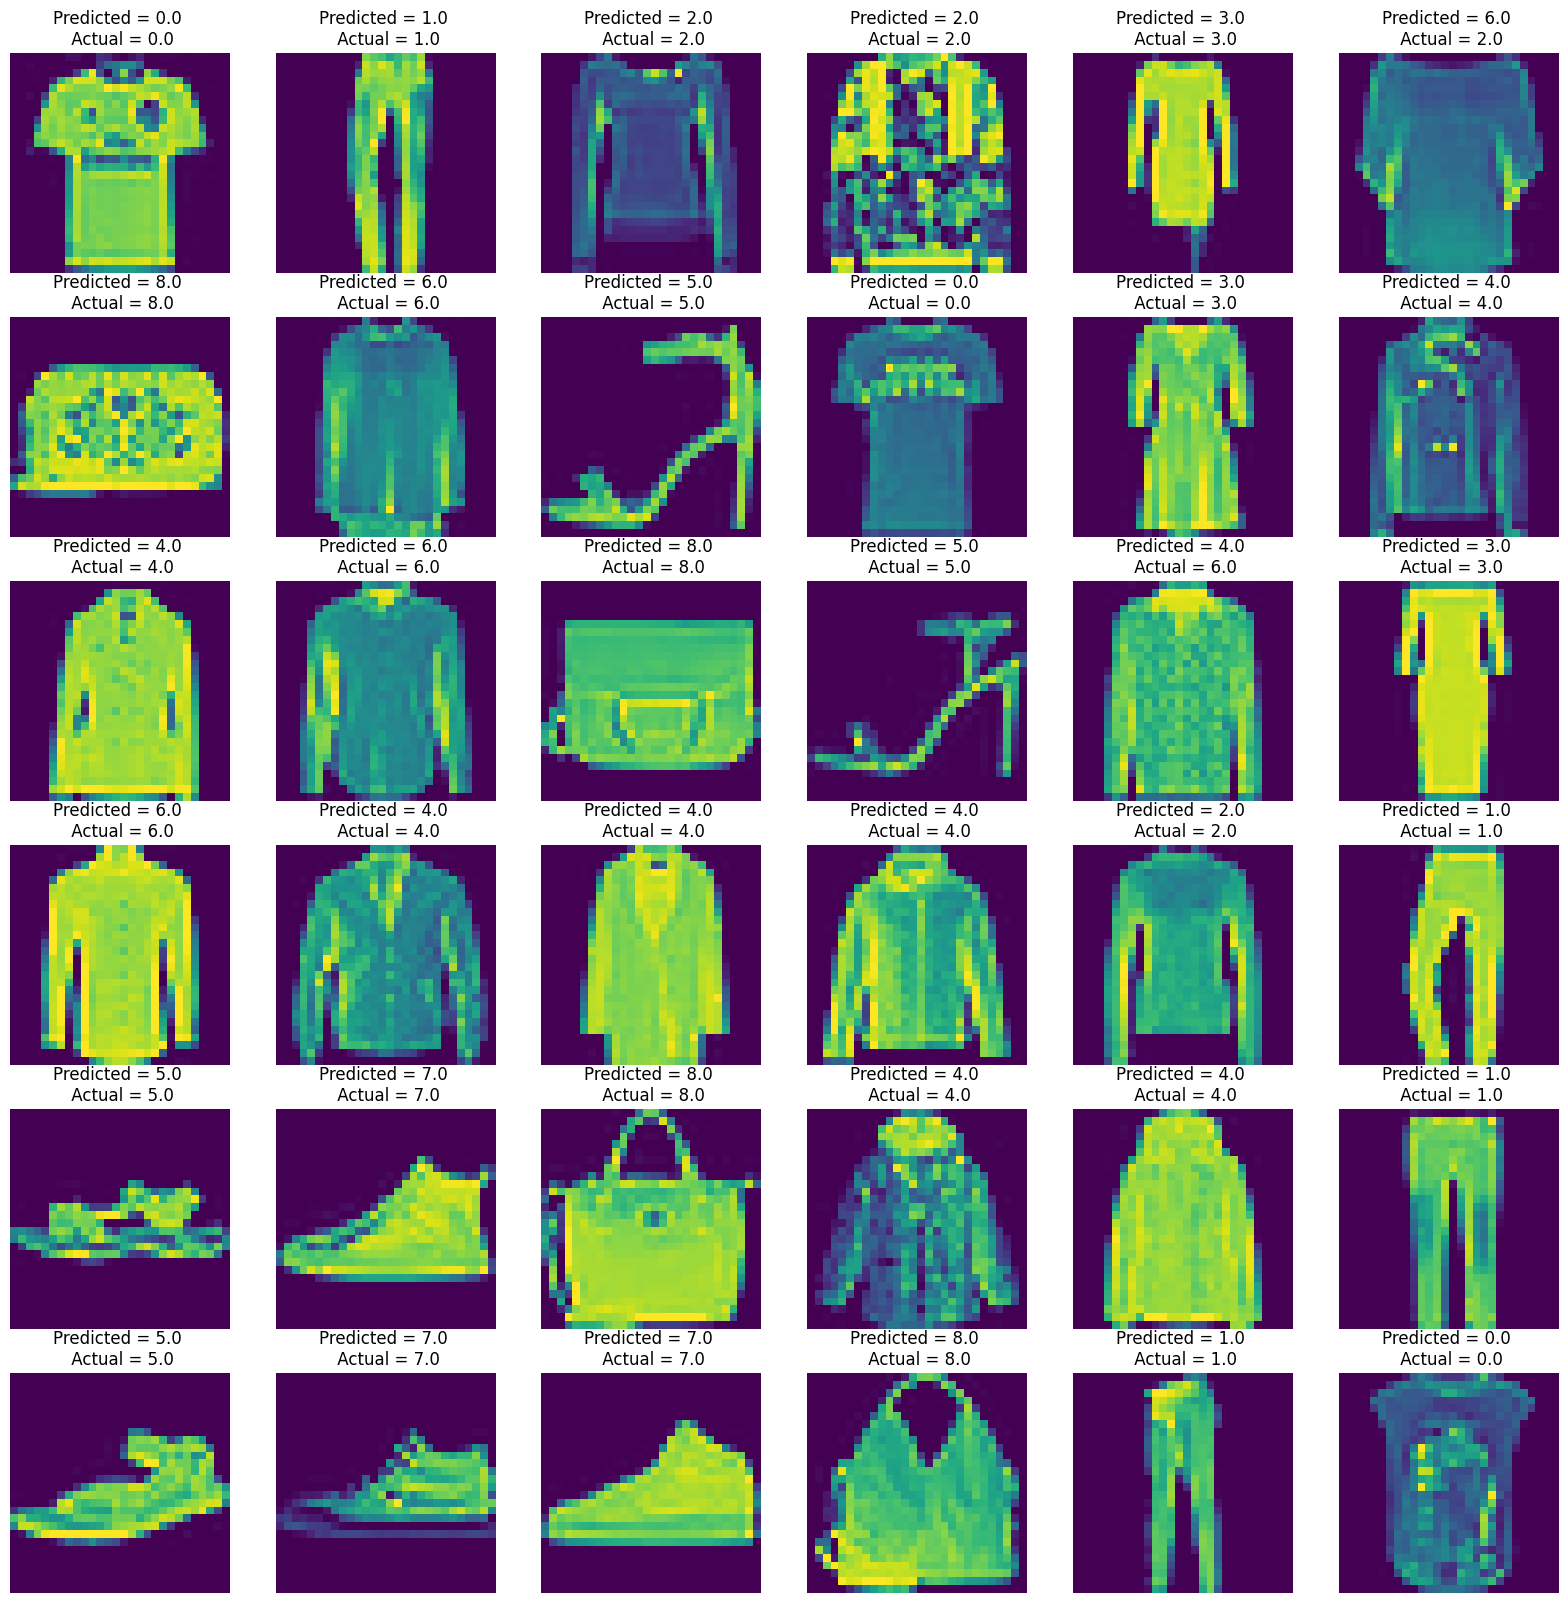

In [ ]:
# Let's visualize some of the predicted classes with it's true classes

Grid_W = 6
Grid_H = 6

fig, axes = plt.subplots(Grid_H, Grid_W, figsize=(20,20))

axes = axes.ravel()

for i in np.arange(0, Grid_H*Grid_W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('Predicted = {:0.1f} \n Actual = {:0.1f}'.format(prediction_classes[i], 
                                                                       y_test[i]))
    axes[i].axis('off')


In [ ]:
#Let's generate a claasification report 

from sklearn.metrics import classification_report

classes = 10
targets = ["Class {}".format(i) for i in range(classes)]

print(classification_report(y_test, prediction_classes, target_names = targets))


              precision    recall  f1-score   support

     Class 0       0.90      0.85      0.87      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.92      0.83      0.87      1000
     Class 3       0.92      0.95      0.94      1000
     Class 4       0.88      0.91      0.90      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.76      0.82      0.79      1000
     Class 7       0.94      0.97      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.96      0.96      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

